In [1]:
# -- Includes parent directory 
import sys 
sys.path.append("../")

# -- import required libraries
import torch 
from hooked_bert import get_hooker_bert_wrapper

In [2]:
wrapper = get_hooker_bert_wrapper('roberta')
wrapper.set_target_modules()
wrapper.register_hooks()

input = torch.tensor([[1,2,3], [4,5,6]])
output = wrapper.model.forward(input)
output.logits.size()

torch.Size([2, 3, 30522])

In [3]:
results = wrapper.get_hooked_result()
results 
for module in results.keys():
    print(f"-----  {module} -----")
    for layer, layer_results in enumerate(results[module]):
        print(layer, layer_results.size())
        if layer > 2: 
            break 
    print("...")

-----  attn -----
0 torch.Size([2, 3, 30522])
1 torch.Size([2, 3, 30522])
2 torch.Size([2, 3, 30522])
3 torch.Size([2, 3, 30522])
...
-----  mlp -----
0 torch.Size([2, 3, 30522])
1 torch.Size([2, 3, 30522])
2 torch.Size([2, 3, 30522])
3 torch.Size([2, 3, 30522])
...
-----  block -----
0 torch.Size([2, 3, 30522])
1 torch.Size([2, 3, 30522])
2 torch.Size([2, 3, 30522])
3 torch.Size([2, 3, 30522])
...


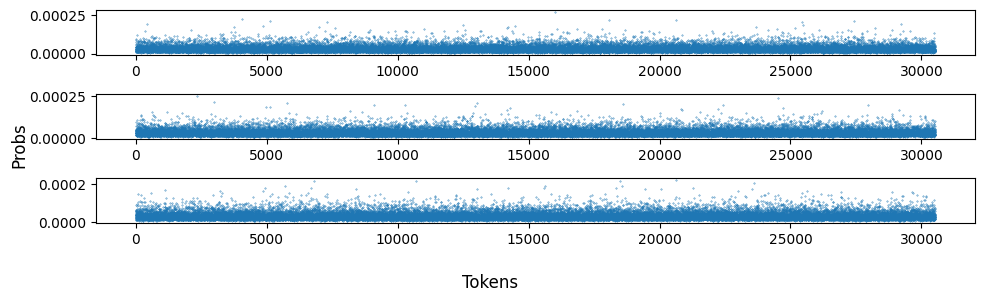

In [17]:
import matplotlib.pyplot as plt  
fig, axes = plt.subplots(3,1, figsize=(10, 3))
for token in range(3):
    probs = results['block'][-1][0, token].detach().numpy()
    axes[token].scatter(range(len(probs)), probs, s=0.1)
fig.supxlabel("Tokens")
fig.supylabel("Probs")
plt.tight_layout()

# Tokenizers 

In [4]:
# find id for word 
# find word for id 
doctor_idx = wrapper.get_index('doctor')
word = wrapper.get_vocab(doctor_idx)
print(word, doctor_idx)

doctor 44914


In [5]:
# Tokens --> IDS

ids = wrapper.tokens_to_ids(['help me please'])
print(ids)

# for undefined token, return <unk>
idx = wrapper.get_index('help me please')
word = wrapper.get_vocab(idx)
print(idx, word)

{'input_ids': [[0, 19178, 162, 2540, 2]], 'attention_mask': [[1, 1, 1, 1, 1]]}
3 <unk>


In [6]:
# IDS --> Tokens

wrapper.ids_to_tokens([1,2,3])

2023-05-24 17:29:21.611578: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


['<pad>', '</s>', '<unk>']